HOG


In [1]:
!pip install scikit-image

In [9]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage import io

In [16]:
image = io.imread('Office.jpg', as_gray=True)

In [23]:
hog_features, hog_image = hog(image, pixels_per_cell=(4, 4), cells_per_block=(4, 4), visualize=True)

In [24]:
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

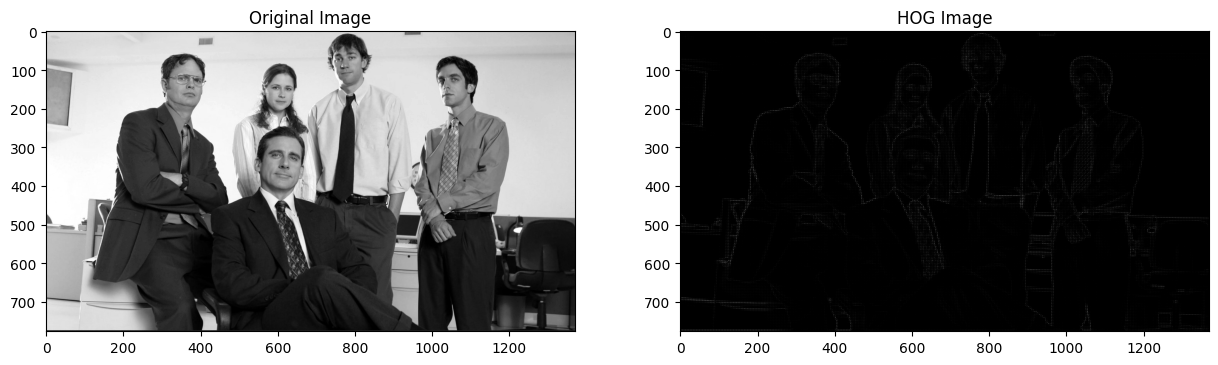

In [25]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()

Face Landmarks+

In [26]:
!pip install dlib opencv-python

In [27]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2024-08-03 08:29:33--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   121MB/s    in 0.5s    

2024-08-03 08:29:34 (121 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [28]:
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

bunzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [36]:
import dlib
import cv2

In [29]:
image = cv2.imread('Office.jpg')
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

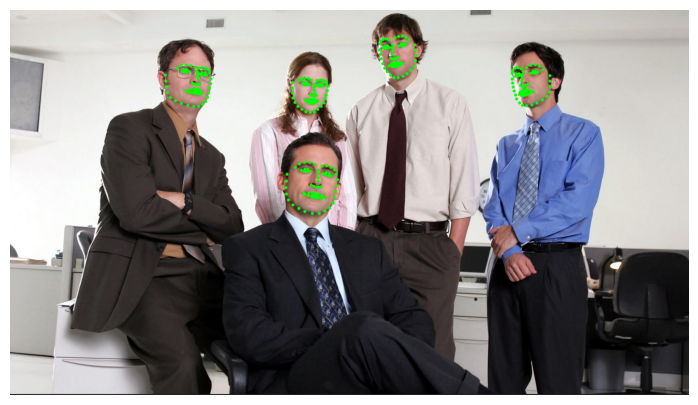

In [33]:
plt.figure(figsize=(10, 5))
for face in faces:
  landmarks = predictor(gray, face)
  for point in landmarks.parts():
    cv2.circle(image, (point.x, point.y), 1, (0, 255, 0))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

Embeddings

In [2]:
!pip install face_recognition
!pip install --upgrade Pillow

In [1]:
from PIL import Image, ImageDraw, ImageFont
import face_recognition
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [35]:
def draw_rec(url_list, url_unknown):
  known_face_encodings = []
  known_face_names = []
  for url in url_list:
    known_face_encodings.append(face_recognition.face_encodings(face_recognition.load_image_file(url))[0])
    known_face_names.append(url.split('.')[0])


  unknown_image = face_recognition.load_image_file(url_unknown)

  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)


  pil_image = Image.fromarray(unknown_image)
  draw = ImageDraw.Draw(pil_image)

  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

      name = "Unknown"

      if True in matches:
          first_match_index = matches.index(True)
          name = known_face_names[first_match_index]

      draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

      font = ImageFont.load_default()
      draw.rectangle(((left, bottom), (right, bottom + 20)), fill=(0, 0, 255), outline=(0, 0, 255))
      draw.text((left + 5, bottom), name, fill=(255, 255, 255, 255),font_size=14)


  del draw
  plt.figure(figsize=(15, 10))
  plt.imshow(pil_image)

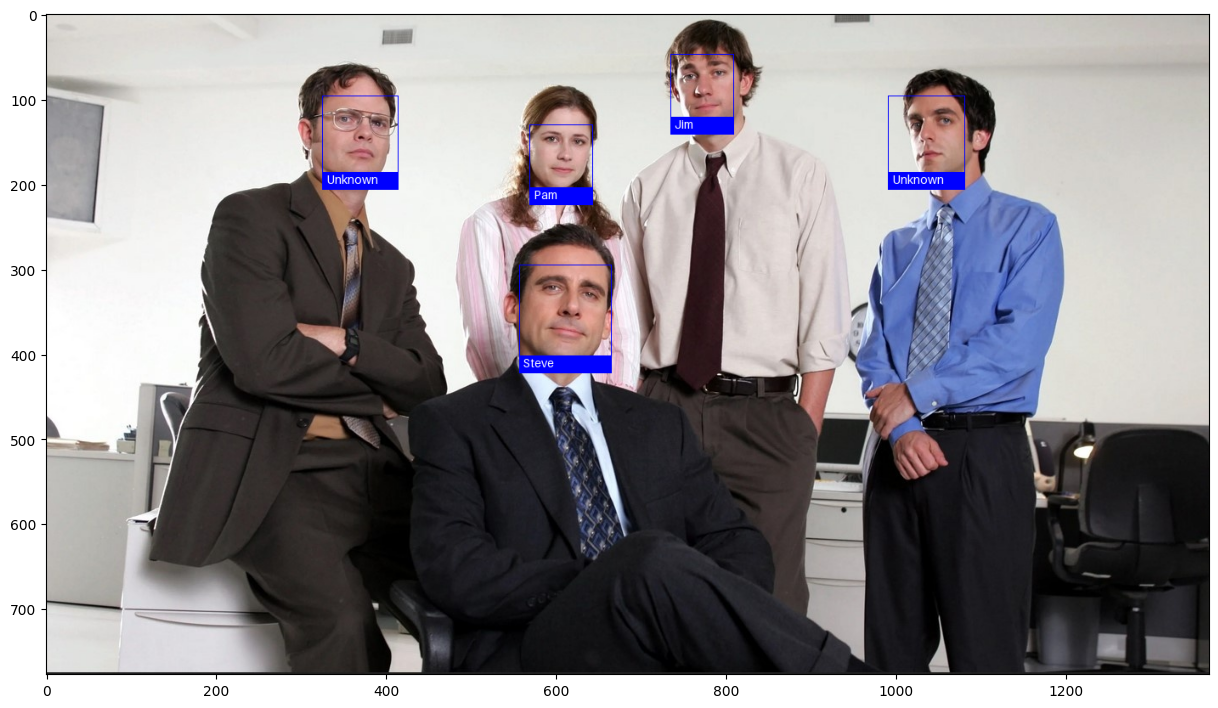

In [36]:
actor_image = ['Pam.jpg', 'Steve.jpg', 'Jim.jpg']
draw_rec(actor_image, 'Office.jpg')

MTCNN

In [22]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.8 MB/s eta 0:00:00


In [24]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import cv2

In [26]:
pixels = plt.imread('Office.jpg')

In [27]:
detector = MTCNN()
results = detector.detect_faces(pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


In [39]:
def draw_facebox(filename, result_list):
    data = plt.imread(filename)
    plt.figure(figsize=(15, 10))
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        ax.add_patch(rect)

    plt.show()

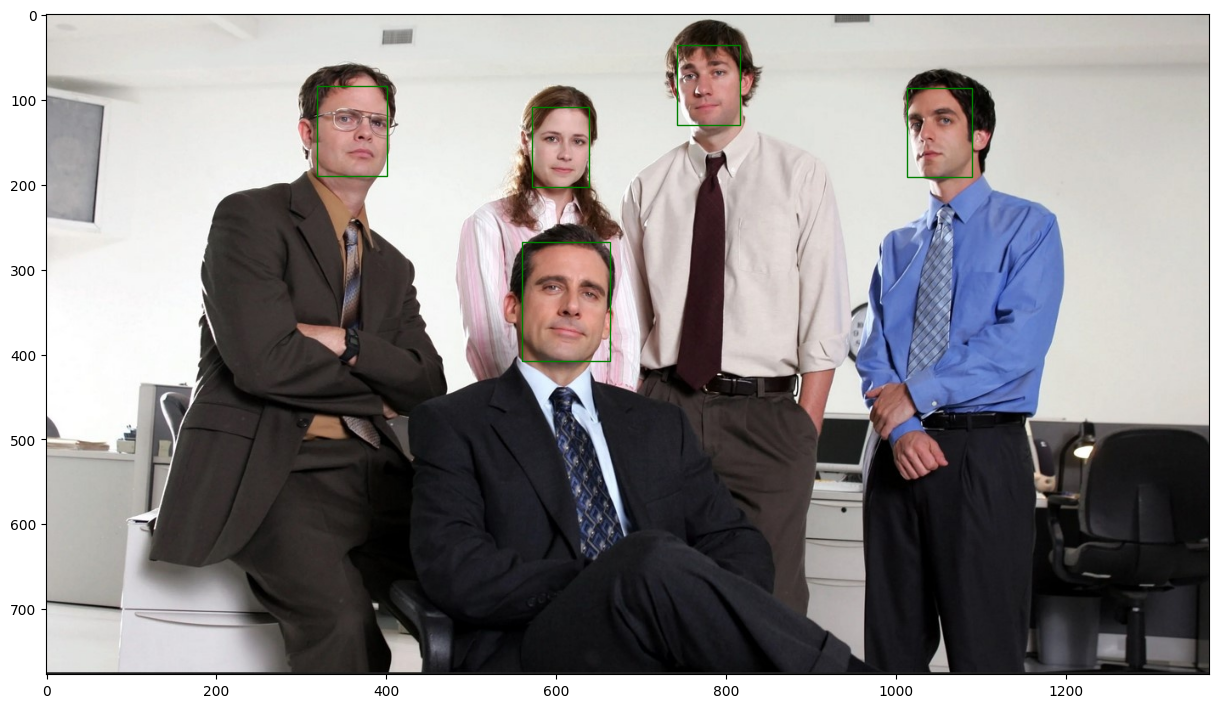

In [40]:
draw_facebox('Office.jpg', results)